In [97]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

### Data Frame creation and plotting

In [98]:
df = pd.DataFrame()

In [99]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

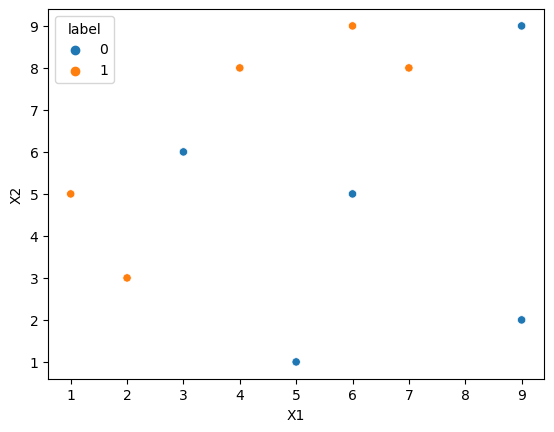

In [100]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

# 1st Iteration

### Step 1- original dataset

#### calculate weights of each row

In [101]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt1 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

### Step 2 - Train 1st model

In [104]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

#### make the decision tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

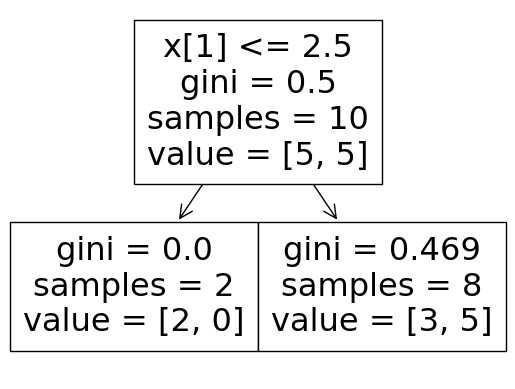

In [105]:
from sklearn.tree import plot_tree
plot_tree(dt1)

#### Plot the graph with split

<Axes: >

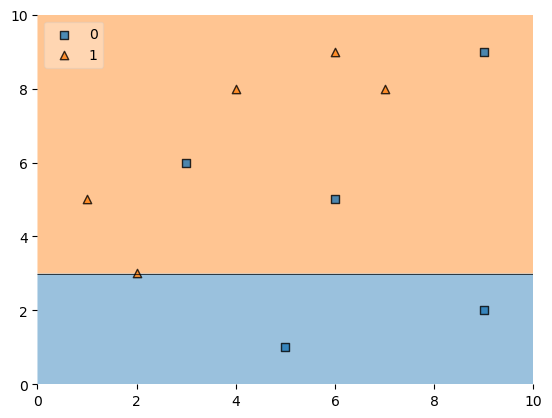

In [106]:
plot_decision_regions(X, y, clf=dt1, legend=2)

### step 3 - Calculate y_prediction

In [107]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [108]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [109]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

### Step 4 - Update weights

In [110]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [111]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [112]:
df['updated_weights'].sum()

0.9165153319682015

#### Normalize the updated weight because updated_weights sum != 1

### step 5 - Normalize weights

In [113]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [114]:
df['nomalized_weights'].sum()

1.0

In [115]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [116]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

### step 6 - Add the ranges

In [117]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


# 2nd Iteration

In [118]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

#### up-sampling

In [119]:
index_values = create_new_dataset(df)
index_values

[3, 2, 3, 7, 2, 7, 2, 0, 4, 8]

### Step 1- Update the dataset

#### weights are same in each iteration

In [121]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
3,4,8,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1


In [122]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [123]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

### step 2- Train the second model

In [124]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.75, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]')]

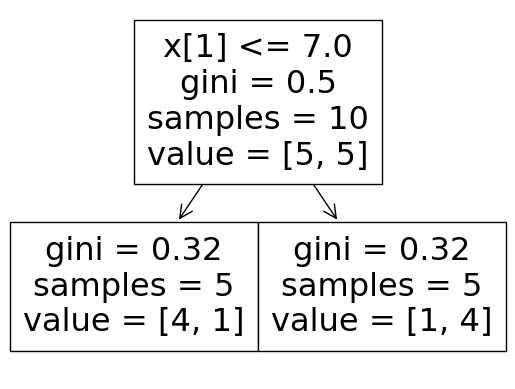

In [125]:
plot_tree(dt2)

<Axes: >

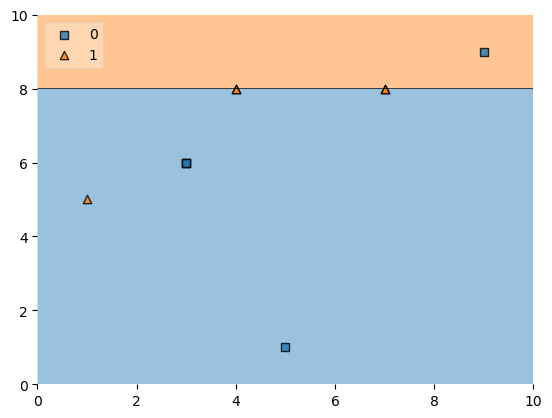

In [126]:
plot_decision_regions(X, y, clf=dt2, legend=2)

### step 3 - calculate y_prediction

In [127]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
0,1,5,1,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,1


In [128]:
alpha2 = calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [129]:
def update_row_weights(row,alpha=0.69):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

### step 4 - Update weights

In [130]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.050158
2,3,6,0,0.1,0,0.050158
3,4,8,1,0.1,1,0.050158
7,7,8,1,0.1,1,0.050158
2,3,6,0,0.1,0,0.050158
7,7,8,1,0.1,1,0.050158
2,3,6,0,0.1,0,0.050158
0,1,5,1,0.1,0,0.199372
4,5,1,0,0.1,0,0.050158
8,9,9,0,0.1,1,0.199372


### step 5 -  Normalize the weights

In [131]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
3,4,8,1,0.1,1,0.050158,0.062697
2,3,6,0,0.1,0,0.050158,0.062697
3,4,8,1,0.1,1,0.050158,0.062697
7,7,8,1,0.1,1,0.050158,0.062697
2,3,6,0,0.1,0,0.050158,0.062697
7,7,8,1,0.1,1,0.050158,0.062697
2,3,6,0,0.1,0,0.050158,0.062697
0,1,5,1,0.1,0,0.199372,0.249213
4,5,1,0,0.1,0,0.050158,0.062697
8,9,9,0,0.1,1,0.199372,0.249213


In [132]:
second_df['nomalized_weights'].sum()

1.0

In [133]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [134]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

### step 6 -  Add ranges

In [135]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.062697,0.000000,0.062697
2,3,6,0,0.1,0,0.062697,0.062697,0.125393
3,4,8,1,0.1,1,0.062697,0.125393,0.188090
7,7,8,1,0.1,1,0.062697,0.188090,0.250787
2,3,6,0,0.1,0,0.062697,0.250787,0.313483
7,7,8,1,0.1,1,0.062697,0.313483,0.376180
2,3,6,0,0.1,0,0.062697,0.376180,0.438877
0,1,5,1,0.1,0,0.249213,0.438877,0.688090
4,5,1,0,0.1,0,0.062697,0.688090,0.750787
8,9,9,0,0.1,1,0.249213,0.750787,1.000000


# 3rd Iteration 

### step 1 - Update the dataset

In [136]:
index_values = create_new_dataset(second_df)

In [137]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
3,4,8,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1


### step 2- Train the third model

In [138]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

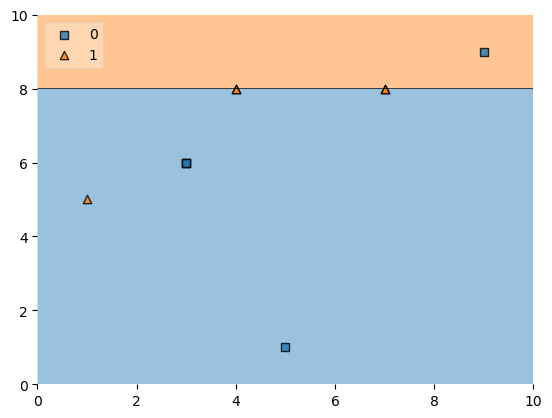

In [139]:
plot_decision_regions(X, y, clf=dt3, legend=2)

### step 3 - calculate y_prediction

In [140]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
3,4,8,1,0.1,0
4,5,1,0,0.1,1
2,3,6,0,0.1,1
7,7,8,1,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,0
3,4,8,1,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,1


In [141]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [142]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 -0.4236489301936017


# Prediction

### for x1=1 and x2=5

In [143]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [144]:
dt2.predict(query)

array([0], dtype=int64)

In [145]:
dt3.predict(query)

array([0], dtype=int64)

In [146]:
alpha1*1 + alpha2*(-1) + alpha3*(-1)

0.15415067982725827

In [147]:
np.sign(0.15)

1.0

### for x1=9 and x2=9

In [148]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [149]:
dt2.predict(query)

array([1], dtype=int64)

In [150]:
dt3.predict(query)

array([1], dtype=int64)

In [151]:
alpha1*(1) + alpha2*(1) + alpha3*(1)

0.6931471805599454

In [152]:
np.sign(0.69)

1.0